In [28]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [29]:
df = pd.read_excel("default of credit card clients.xls", header=1, index_col=0)
df.head(30)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [30]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled.shape

(30000, 24)

In [31]:
data_imputed = pd.DataFrame(data_scaled, columns=df.columns)

<Axes: >

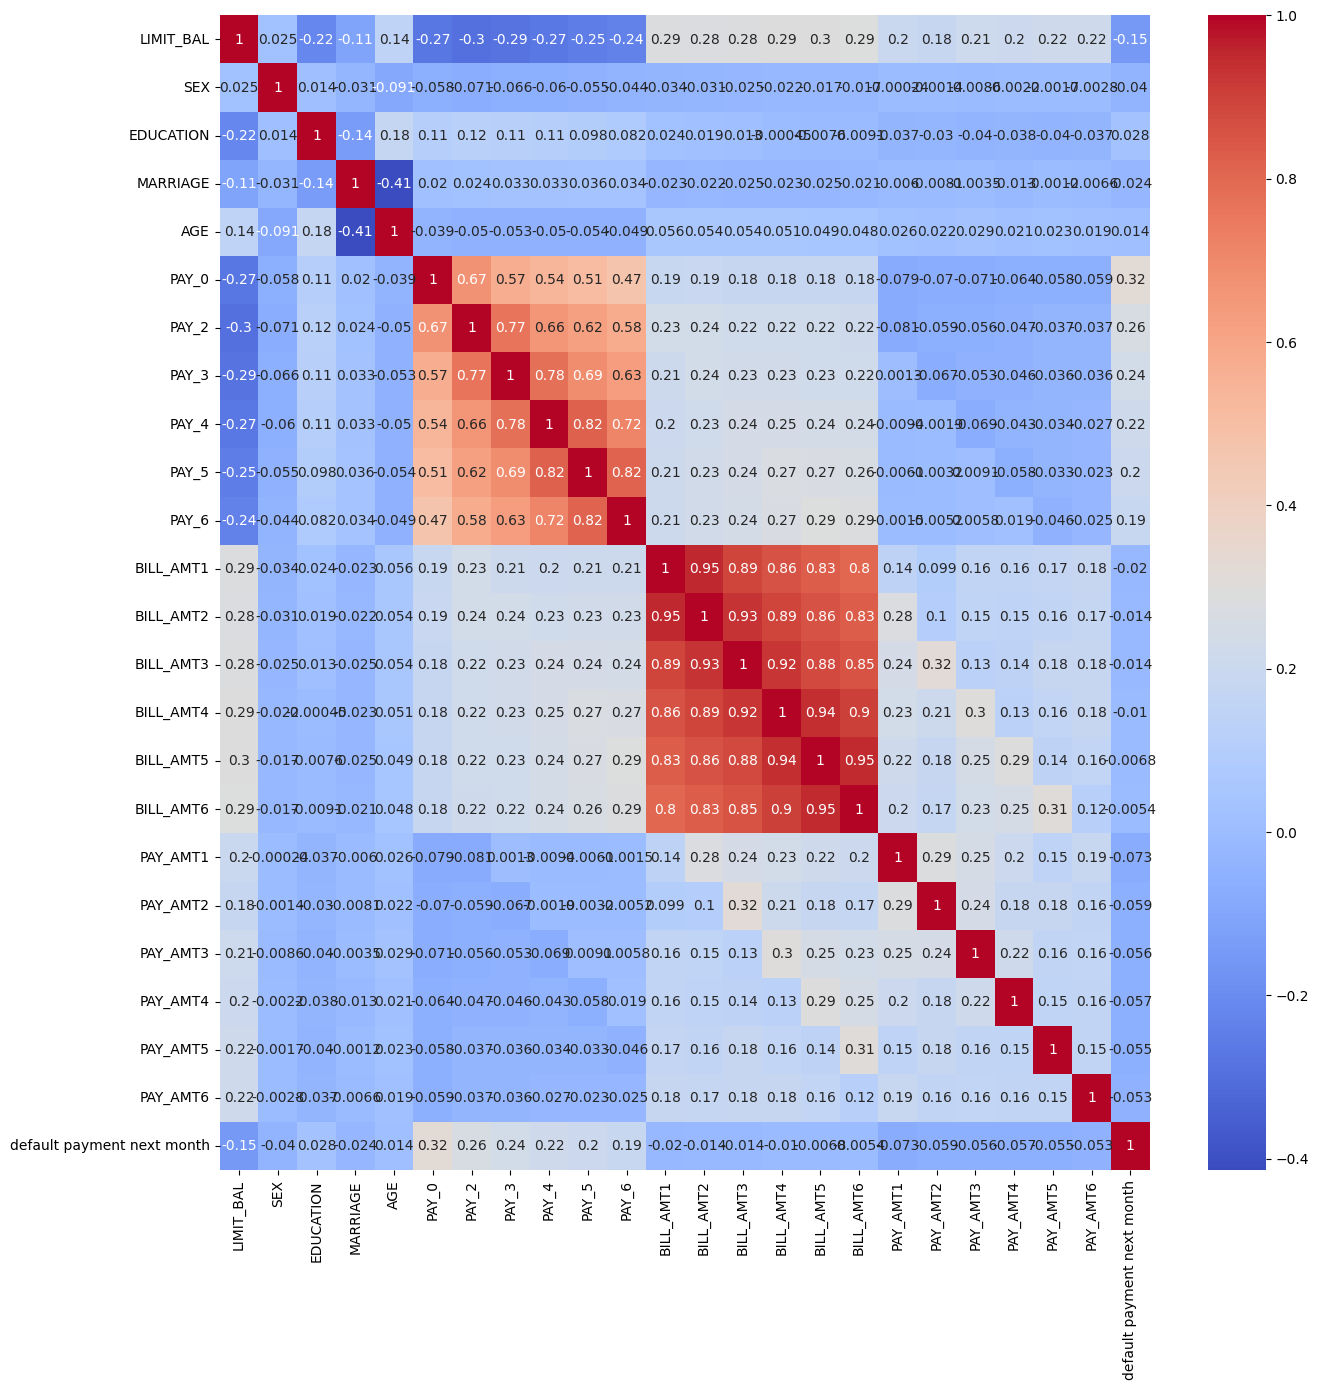

In [32]:
plt.figure(figsize = (15, 15))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

In [33]:
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

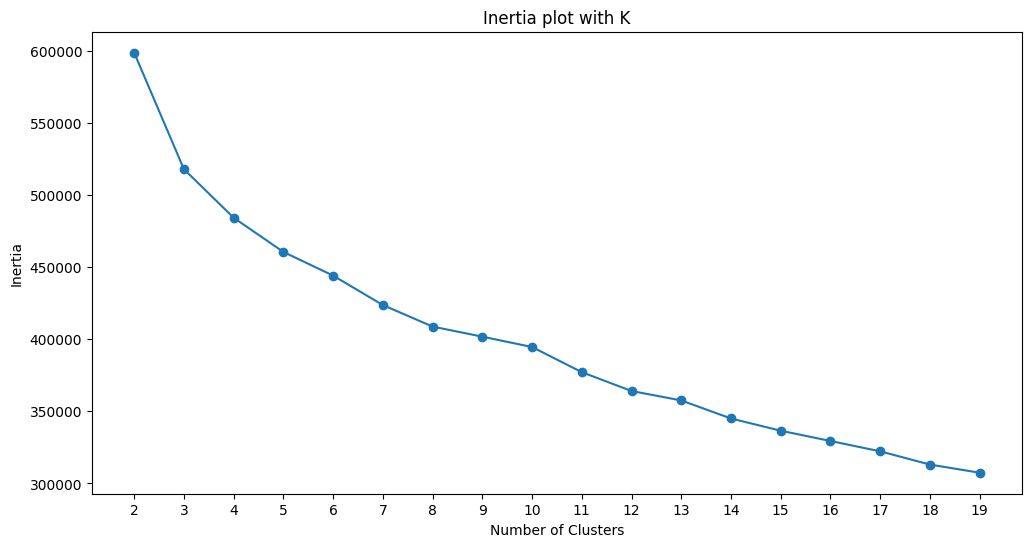

In [34]:
inertia_plot(KMeans, data_imputed)

by elbow method, we pick 6 as a cluster number

In [35]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()


In [36]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.33457333223337965
Silhouette-Score for 3 Clusters:  0.17296681500860586
Silhouette-Score for 4 Clusters:  0.15326790248143993
Silhouette-Score for 5 Clusters:  0.14595436740312298
Silhouette-Score for 6 Clusters:  0.15286289862964203


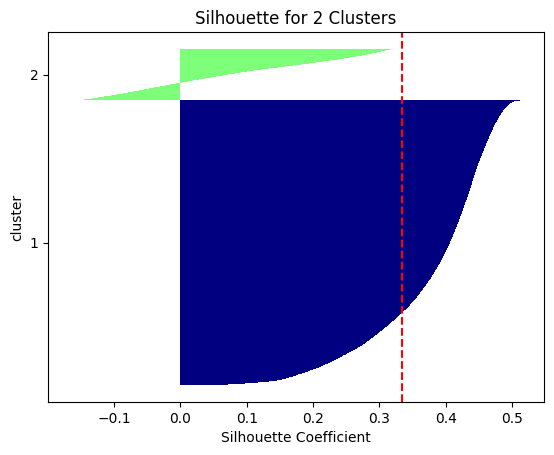

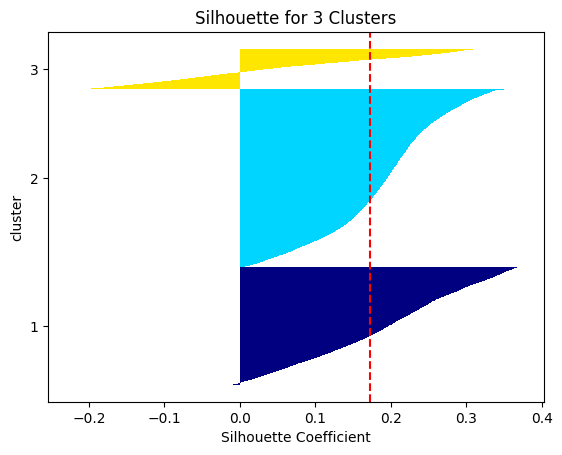

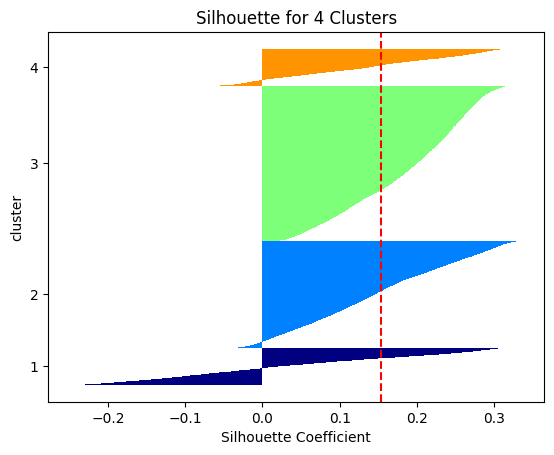

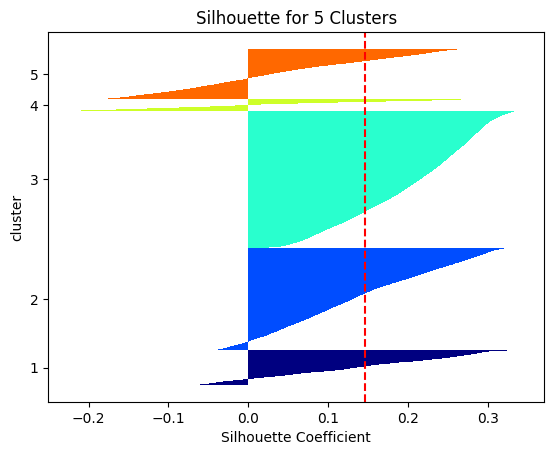

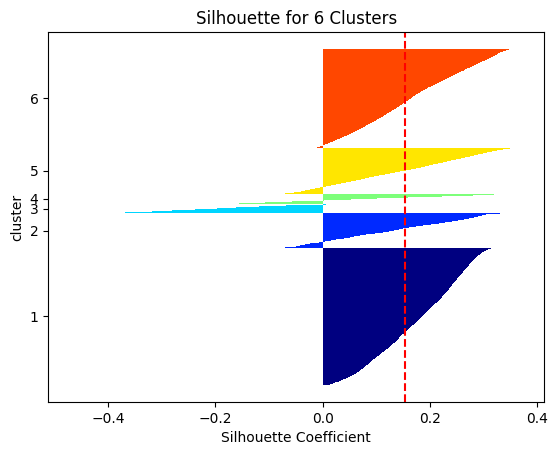

In [37]:
silh_samp_cluster(KMeans, data_imputed, stop=7)

In [38]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.5089157225444007        Inertia:  201562.23357939423
Silhouette-Score for 3 Clusters:  0.4436807458633084        Inertia:  122146.83488030548
Silhouette-Score for 4 Clusters:  0.4540241271167919        Inertia:  91866.53601332828
Silhouette-Score for 5 Clusters:  0.4660536091950642        Inertia:  68404.14273630586
Silhouette-Score for 6 Clusters:  0.45517820405517584        Inertia:  58437.5640609632

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.46588239498641076        Inertia:  247955.04447444098
Silhouette-Score for 3 Clusters:  0.3627569229063322        Inertia:  168384.87040912616
Silhouette-Score for 4 Clusters:  0.3571327882102698        Inertia:  137795.63231315874
Silhouette-Score for 5 Clusters:  0.3606466232766963        Inertia:  114217.70030322905
Silhouette-Score for 6 Clusters:  0.37212553126670767        Inertia:  103019.52172449366

PCA with # of components:  4
Silhouette-Score for 2

Choose PCA compoments = 2

Text(0, 0.5, 'PC2')

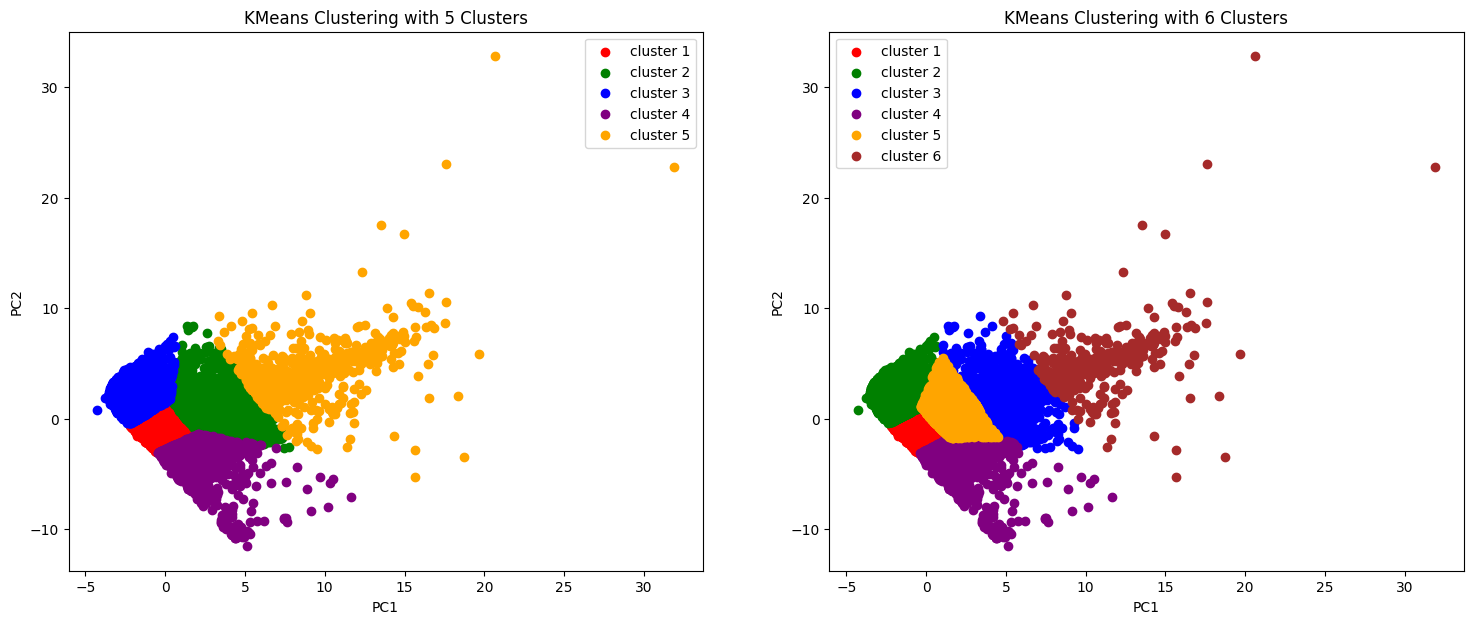

In [41]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')